In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EWqi0Y7RW_v-J4S3TBeVsAkHNZJH63kDm8FHKlzgDwOR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredito-donotdelete-pr-fapohsvbzimnqk'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EWqi0Y7RW_v-J4S3TBeVsAkHNZJH63kDm8FHKlzgDwOR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredito-donotdelete-pr-fapohsvbzimnqk'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
print(data.columns,data.shape)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object') (400, 9)


In [65]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [66]:
print(data.corr())

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [68]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [69]:
print("University ratings:",set(data["University Rating"]),"Research:",set(data["Research"]))

University ratings: {1, 2, 3, 4, 5} Research: {0, 1}


<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

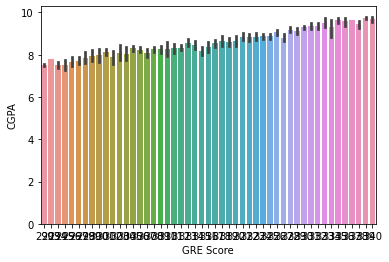

In [70]:
sns.barplot(data["GRE Score"],data["CGPA"])

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

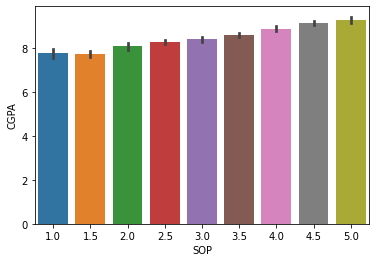

In [71]:
sns.barplot(data["SOP"],data["CGPA"])

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

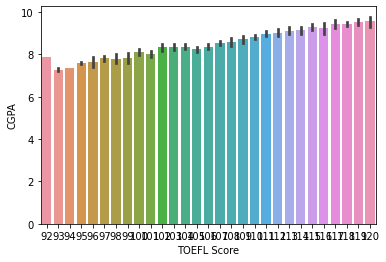

In [72]:
sns.barplot(data["TOEFL Score"],data["CGPA"])

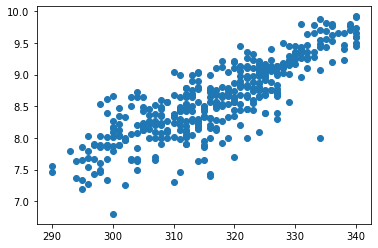

In [73]:
plt.scatter(data['GRE Score'],data['CGPA'])

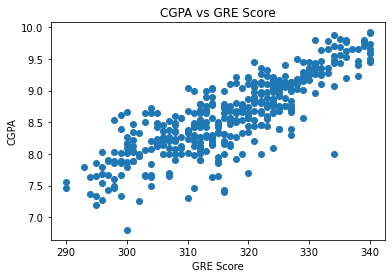

In [74]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

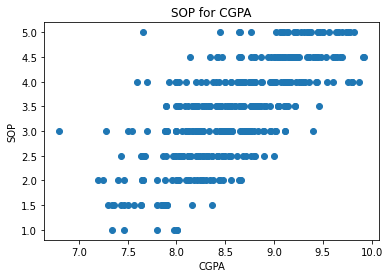

In [75]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

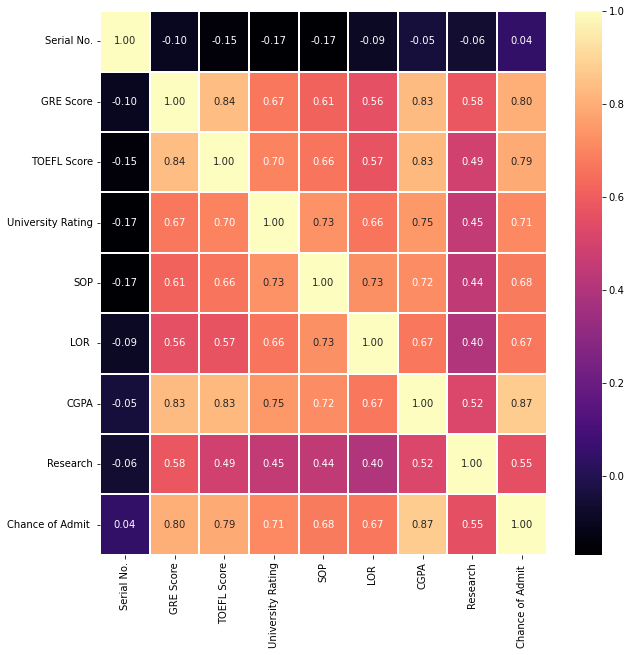

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

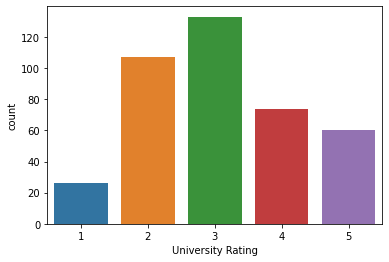

In [77]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

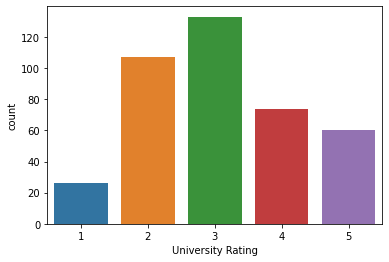

In [78]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

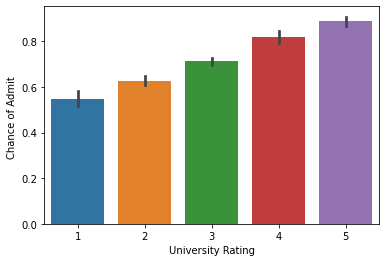

In [79]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

In [80]:
x = data.iloc[:, :-1]
y = data['Chance of Admit ']

In [81]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [82]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [83]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)


GradientBoostingRegressor()

In [85]:
model.score(x_test,y_test)


0.8029695575940288

In [86]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(x_test)

In [87]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)


In [88]:
from sklearn.linear_model._logistic import LogisticRegression
lore = LogisticRegression(random_state=0, max_iter=1000)
lr_model = lore.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9375
Recall Score: 0.9487179487179487
ROC AUC Score: 0.7243589743589743
Confussion Matrix:
 [[ 1  1]
 [ 4 74]]


In [90]:
pip install -U ibm-watson-machine-learning


Note: you may need to restart the kernel to use updated packages.


In [91]:
from ibm_watson_machine_learning import APIClient
import json

In [92]:
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"j1xfIQu_ohTG4VS2Mvo8tEsr4qdFfqBWMKGNGVgzfS07"
     }
client=APIClient(wml_credentials)

In [93]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------  ------------------------
ID                                    NAME              CREATED
cbc00b92-060b-4180-8969-fa0f85aacb74  model_deployment  2022-11-19T00:06:07.804Z
------------------------------------  ----------------  ------------------------


In [94]:
SPACE_ID = "cbc00b92-060b-4180-8969-fa0f85aacb74"
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [95]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [96]:
import sklearn
sklearn.__version__

'1.0.2'

In [97]:
MODEL_NAME = 'univ_ad'
DEPLOYMENT_NAME = 'iris_adm'
DEMO_MODEL = lr_model

In [98]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)


model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'Serial No.', 'type': 'int64'},
      {'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-19T04:48:15.134Z',
  'id': 'cfe22175-92f8-4590-8c6b-5e1ce6aecbe0',
  'modified_at': '2022-11-19T04:48:17.898Z',
  'name': 'univ_ad',
  'owner': 'IBMid-6640044W9P',
  'resource_key': '36603b3a-2a78-4286-9291-4ea234749294',
  'space_id': 'cbc00b92-060b-4180-8969-fa0f85aacb74'},
 'system'

In [99]:
model_id = wml_client.repository.get_model_id(model_details)
model_id
    


'cfe22175-92f8-4590-8c6b-5e1ce6aecbe0'

In [100]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'cfe22175-92f8-4590-8c6b-5e1ce6aecbe0' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='43c36275-23c1-4656-9df2-21867887dc28'
------------------------------------------------------------------------------------------------




In [101]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
